# Partie 1 : MLP 

In [6]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy  # This might already be installed as a dependency of other packages
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 11.2/18.2 MB 1.3 MB/s eta 0:00:06m
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/lib/python3/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plta
import numpy as np
import pickle
import glob
import pandas as p
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [2]:
file_path = "./tcpDDOS.csv"

initial_df = pd.read_csv(file_path)

initial_df

,No.,Time,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,ACK Flag Count,URG Flag Count,Subflow Bwd Packets
0,1,0.000000,192.168.233.3,192.168.233.4,TCP,74,52120 > 5201 [SYN] Seq=0 Win=64240 Len=0 MSS...,2.245683e+09,5201,52120,eth:ethertype:ip:tcp,0.000000,NaN,NaN,0,40,74,Not set,Not set,NaN
1,2,0.000065,192.168.233.4,192.168.233.3,TCP,74,"5201 > 52120 [SYN, ACK] Seq=0 Ack=1 Win=6516...",3.722622e+09,52120,5201,eth:ethertype:ip:tcp,0.000065,0.000065,NaN,0,40,74,Set,Not set,0.000065
2,3,0.000356,192.168.233.3,192.168.233.4,TCP,66,52120 > 5201 [ACK] Seq=1 Ack=1 Win=64256 Len...,2.245683e+09,5201,52120,eth:ethertype:ip:tcp,0.000291,0.000291,NaN,0,32,66,Set,Not set,0.000291
3,4,0.003793,192.168.233.3,192.168.233.4,TCP,103,"52120 > 5201 [PSH, ACK] Seq=1 Ack=1 Win=6425...",2.245683e+09,5201,52120,eth:ethertype:ip:tcp:data,0.003437,NaN,NaN,37,32,103,Set,Not set,NaN
4,5,0.003837,192.168.233.4,192.168.233.3,TCP,66,5201 > 52120 [ACK] Seq=1 Ack=38 Win=65152 Le...,3.722622e+09,52120,5201,eth:ethertype:ip:tcp,0.000044,0.000044,NaN,0,32,66,Set,Not set,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426593,426594,33.491317,192.168.233.3,192.168.233.4,TCP,17442,52136 > 5201 [ACK] Seq=815472166 Ack=1 Win=6...,2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000175,NaN,NaN,17376,32,17442,Set,Not set,NaN
426594,426595,33.491334,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=815489542 Win=3...,3.722656e+09,52136,5201,eth:ethertype:ip:tcp,0.000017,0.000017,NaN,0,32,66,Set,Not set,0.000017
426595,426596,33.491405,192.168.233.3,192.168.233.4,TCP,47850,"52136 > 5201 [PSH, ACK] Seq=815489542 Ack=1 ...",2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000071,NaN,NaN,47784,32,47850,Set,Not set,NaN
426596,426597,33.491437,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=815537326 Ack=1 Win=6...,2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,20272,32,20338,Set,Not set,NaN


In [298]:
# empty_label_rows = initial_df[initial_df['label'].isna()]

# # Print the rows with empty or NaN labels
# print("Rows with empty or NaN labels:")
# print(empty_label_rows)

In [3]:
label_df = pd.DataFrame(initial_df['label'])

label_df.head(50)

label_counts = initial_df['label']

labels_attack = label_counts[label_counts.isna()]
labels_benign = label_counts[~label_counts.isna()]

labels_benign

0         2.245683e+09
1         3.722622e+09
2         2.245683e+09
3         2.245683e+09
4         3.722622e+09
              ...     
426593    2.245717e+09
426594    3.722656e+09
426595    2.245717e+09
426596    2.245717e+09
426597    3.722656e+09
Name: label, Length: 278022, dtype: float64

In [4]:
def z_score(input_df):
    # copy the data
    df_z_scaled = input_df

    # apply normalization techniques
    for column in df_z_scaled.columns:
        df_z_scaled[column] = (df_z_scaled[column] -
                               df_z_scaled[column].mean()) / df_z_scaled[column].std()    

    # view normalized data   
    return df_z_scaled

### data

In [5]:
new_df = initial_df.copy()
new_df

,No.,Time,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,ACK Flag Count,URG Flag Count,Subflow Bwd Packets
0,1,0.000000,192.168.233.3,192.168.233.4,TCP,74,52120 > 5201 [SYN] Seq=0 Win=64240 Len=0 MSS...,2.245683e+09,5201,52120,eth:ethertype:ip:tcp,0.000000,NaN,NaN,0,40,74,Not set,Not set,NaN
1,2,0.000065,192.168.233.4,192.168.233.3,TCP,74,"5201 > 52120 [SYN, ACK] Seq=0 Ack=1 Win=6516...",3.722622e+09,52120,5201,eth:ethertype:ip:tcp,0.000065,0.000065,NaN,0,40,74,Set,Not set,0.000065
2,3,0.000356,192.168.233.3,192.168.233.4,TCP,66,52120 > 5201 [ACK] Seq=1 Ack=1 Win=64256 Len...,2.245683e+09,5201,52120,eth:ethertype:ip:tcp,0.000291,0.000291,NaN,0,32,66,Set,Not set,0.000291
3,4,0.003793,192.168.233.3,192.168.233.4,TCP,103,"52120 > 5201 [PSH, ACK] Seq=1 Ack=1 Win=6425...",2.245683e+09,5201,52120,eth:ethertype:ip:tcp:data,0.003437,NaN,NaN,37,32,103,Set,Not set,NaN
4,5,0.003837,192.168.233.4,192.168.233.3,TCP,66,5201 > 52120 [ACK] Seq=1 Ack=38 Win=65152 Le...,3.722622e+09,52120,5201,eth:ethertype:ip:tcp,0.000044,0.000044,NaN,0,32,66,Set,Not set,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426593,426594,33.491317,192.168.233.3,192.168.233.4,TCP,17442,52136 > 5201 [ACK] Seq=815472166 Ack=1 Win=6...,2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000175,NaN,NaN,17376,32,17442,Set,Not set,NaN
426594,426595,33.491334,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=815489542 Win=3...,3.722656e+09,52136,5201,eth:ethertype:ip:tcp,0.000017,0.000017,NaN,0,32,66,Set,Not set,0.000017
426595,426596,33.491405,192.168.233.3,192.168.233.4,TCP,47850,"52136 > 5201 [PSH, ACK] Seq=815489542 Ack=1 ...",2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000071,NaN,NaN,47784,32,47850,Set,Not set,NaN
426596,426597,33.491437,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=815537326 Ack=1 Win=6...,2.245717e+09,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,20272,32,20338,Set,Not set,NaN


In [6]:
# Replace empty strings and NaN values in the 'label' column with 'attack'
new_df['label'] = new_df['label'].fillna('attack')

# Replace all remaining labels (excluding 'attack') with 'benign'
new_df.loc[new_df['label'] != 'attack', 'label'] = 'benign'

print(new_df.head())

   No.      Time         Source    Destination Protocol  Length  \
0    1  0.000000  192.168.233.3  192.168.233.4      TCP      74   
1    2  0.000065  192.168.233.4  192.168.233.3      TCP      74   
2    3  0.000356  192.168.233.3  192.168.233.4      TCP      66   
3    4  0.003793  192.168.233.3  192.168.233.4      TCP     103   
4    5  0.003837  192.168.233.4  192.168.233.3      TCP      66   

                                                Info   label  dest port  \
0  52120  >  5201 [SYN] Seq=0 Win=64240 Len=0 MSS...  benign       5201   
1  5201  >  52120 [SYN, ACK] Seq=0 Ack=1 Win=6516...  benign      52120   
2  52120  >  5201 [ACK] Seq=1 Ack=1 Win=64256 Len...  benign       5201   
3  52120  >  5201 [PSH, ACK] Seq=1 Ack=1 Win=6425...  benign       5201   
4  5201  >  52120 [ACK] Seq=1 Ack=38 Win=65152 Le...  benign      52120   

   source port                   protocol  flow duration  Total Fwd Packets  \
0        52120       eth:ethertype:ip:tcp       0.000000           

In [21]:
label_counts = new_df['label'].value_counts()
label_counts

label
benign    278022
attack    148576
Name: count, dtype: int64

### pre-sampling

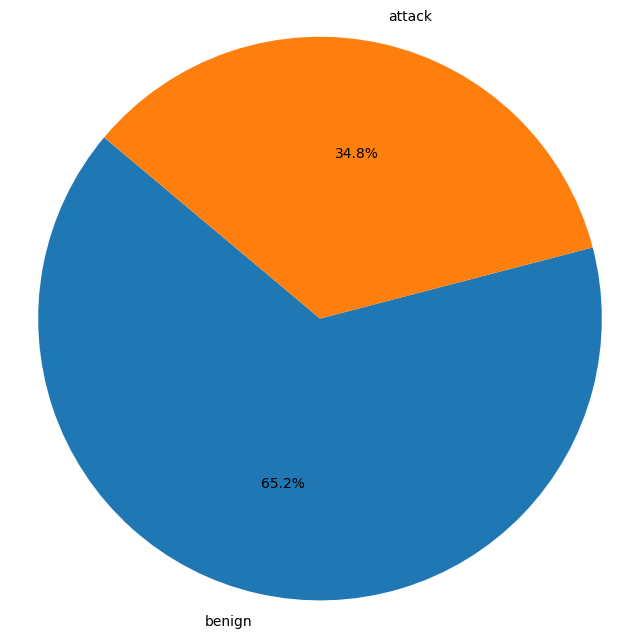

In [22]:

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [23]:
label_counts = pd.DataFrame(new_df['label'].value_counts()).reset_index()

In [25]:
label_counts

,label,count
0,benign,278022
1,attack,148576


In [27]:
#SAMPLING
attack_sample_df_dic = {}
labels = label_counts['label']
attack_df = new_df[ new_df['label'] != 'benign' ]
for label in labels:
    #5% of attacks
    attack_sample_df_dic[label] = attack_df[attack_df['label'] == label][:1000]

attack_sample_df = pd.concat(attack_sample_df_dic)
# 10% attacks vs 90% benign
BENIGN_sample_df = new_df[new_df['label'] == 'benign'][:19000]

sampled_df_1 =  pd.concat([attack_sample_df, BENIGN_sample_df])


In [28]:
sampled_df_1

,No.,Time,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,ACK Flag Count,URG Flag Count,Subflow Bwd Packets
"(attack, 66070)",66071,8.228322,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66071)",66072,8.228426,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66072)",66073,8.233974,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66073)",66074,8.233975,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66074)",66075,8.233975,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,1.328329,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,0.000033,NaN,0,32,66,Set,Not set,0.000033
18996,18997,1.328360,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,23168,32,23234,Set,Not set,NaN
18997,18998,1.328400,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,0.000040,NaN,0,32,66,Set,Not set,0.000040
18998,18999,1.328404,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,NaN,NaN,33304,32,33370,Set,Not set,NaN


### post-sampling

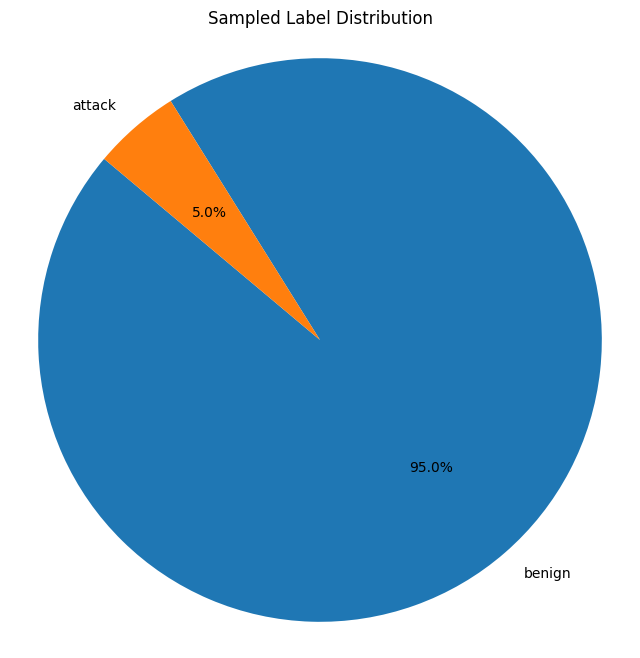

In [29]:
sampled_label_counts = sampled_df_1['label'].value_counts()

# Create a pie chart for the sampled dataset
plt.figure(figsize=(8, 8))
plt.pie(sampled_label_counts, labels=sampled_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sampled Label Distribution')
plt.axis('equal')  
plt.show()

### Preprocessing

In [30]:
df = sampled_df_1.copy()

In [31]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,ACK Flag Count,URG Flag Count,Subflow Bwd Packets
"(attack, 66070)",66071,8.228322,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66071)",66072,8.228426,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66072)",66073,8.233974,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66073)",66074,8.233975,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
"(attack, 66074)",66075,8.233975,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,Not set,Not set,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,1.328329,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,0.000033,NaN,0,32,66,Set,Not set,0.000033
18996,18997,1.328360,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,23168,32,23234,Set,Not set,NaN
18997,18998,1.328400,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,0.000040,NaN,0,32,66,Set,Not set,0.000040
18998,18999,1.328404,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,NaN,NaN,33304,32,33370,Set,Not set,NaN


In [32]:
# df_1 = df.replace(np.inf, np.nan)
# df_1.isnull().sum().sum()
#sns.heatmap(df_1 == np.nan)

In [33]:
# df_2 = df_1.dropna(axis=0)
# df_2.isnull().sum().sum()

In [34]:
# df_std = pd.DataFrame(df.std(), columns = ['value'])
# unchange_col = df_std[df_std['value'] == 0].index
# unchange_col
# df_3 = df_2.drop(unchange_col, axis=1)
# df_3

In [35]:
df_object = df.select_dtypes(include='object')
df_object.columns

Index(['Source', 'Destination', 'Protocol', 'Info', 'label', 'protocol',
       'ACK Flag Count', 'URG Flag Count'],
      dtype='object')

In [36]:
df_4 = df.drop(['ACK Flag Count', 'URG Flag Count'], axis=1)

In [37]:
df_4

,No.,Time,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,Subflow Bwd Packets
"(attack, 66070)",66071,8.228322,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66071)",66072,8.228426,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66072)",66073,8.233974,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66073)",66074,8.233975,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66074)",66075,8.233975,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,1.328329,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,0.000033,NaN,0,32,66,0.000033
18996,18997,1.328360,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,23168,32,23234,NaN
18997,18998,1.328400,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,0.000040,NaN,0,32,66,0.000040
18998,18999,1.328404,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,NaN,NaN,33304,32,33370,NaN


In [38]:
df_4['Time'].value_counts()

Time
8.228322    1
0.799337    1
0.799517    1
0.799492    1
0.799459    1
           ..
0.354726    1
0.354651    1
0.354613    1
0.354556    1
1.328430    1
Name: count, Length: 20000, dtype: int64

In [39]:
df_4.drop(['Time'], axis=1, inplace = True)

In [40]:
df_4

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,Subflow Bwd Packets
"(attack, 66070)",66071,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66071)",66072,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66072)",66073,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66073)",66074,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
"(attack, 66074)",66075,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,NaN,NaN,120,20,174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,0.000033,NaN,0,32,66,0.000033
18996,18997,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,NaN,23168,32,23234,NaN
18997,18998,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,0.000040,NaN,0,32,66,0.000040
18998,18999,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,NaN,NaN,33304,32,33370,NaN


In [41]:
df_4['Total Length of Bwd Packets'].value_counts()

Series([], Name: count, dtype: int64)

In [42]:
df_4.drop(['Total Length of Bwd Packets'], axis=1, inplace = True)

In [54]:
df_4

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Total Fwd Packets,Fwd Packet Length Max,Fwd Header Length,Bwd Header Length,Subflow Bwd Packets
"(attack, 66070)",66071,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,NaN,120,20,174,NaN
"(attack, 66071)",66072,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,NaN,120,20,174,NaN
"(attack, 66072)",66073,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,NaN,120,20,174,NaN
"(attack, 66073)",66074,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,NaN,120,20,174,NaN
"(attack, 66074)",66075,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,NaN,120,20,174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,0.000033,0,32,66,0.000033
18996,18997,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,NaN,23168,32,23234,NaN
18997,18998,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,0.000040,0,32,66,0.000040
18998,18999,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,NaN,33304,32,33370,NaN


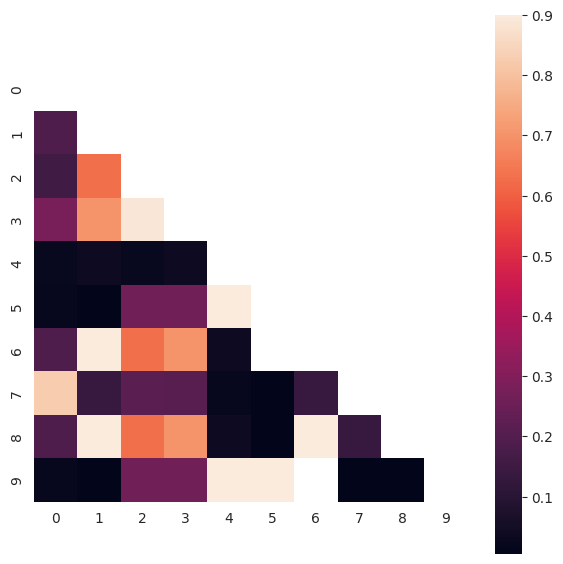

In [55]:
# Select only numeric columns from df_4
df_numeric = df_4.select_dtypes(include=[np.number])

# Compute the correlation matrix of the numeric DataFrame
df_corr = df_numeric.corr().abs()

# Continue with your existing code for plotting
corr_val = df_corr.values
corr_val[1][1] = 1  # You might not need this line depending on your intention. It sets the diagonal value to 1, but it's already 1 for correlation matrices.
mask = np.zeros_like(corr_val)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True)


In [57]:
high_corr = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool_))


In [58]:
to_drop = [column for column in high_corr.columns if any(high_corr[column] > 0.90)]
to_drop

['Total Fwd Packets',
 'Fwd Packet Length Max',
 'Bwd Header Length',
 'Subflow Bwd Packets']

In [59]:
df_5 = df_4.drop(to_drop, axis=1)
df_5

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Fwd Header Length
"(attack, 66070)",66071,41.146.181.222,192.168.233.4,TCP,174,2915 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2915,eth:ethertype:ip:tcp:data,0.000000,20
"(attack, 66071)",66072,146.243.107.168,192.168.233.4,TCP,174,2916 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2916,eth:ethertype:ip:tcp:data,0.000000,20
"(attack, 66072)",66073,192.183.47.127,192.168.233.4,TCP,174,2917 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2917,eth:ethertype:ip:tcp:data,0.000000,20
"(attack, 66073)",66074,89.82.221.232,192.168.233.4,TCP,174,2918 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2918,eth:ethertype:ip:tcp:data,0.000000,20
"(attack, 66074)",66075,73.76.215.151,192.168.233.4,TCP,174,2919 > 4040 [SYN] Seq=0 Win=64 Len=120,attack,4040,2919,eth:ethertype:ip:tcp:data,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18996,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333074950 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000033,32
18996,18997,192.168.233.3,192.168.233.4,TCP,23234,"52136 > 5201 [PSH, ACK] Seq=333074950 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,0.000031,32
18997,18998,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=333098118 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,0.000040,32
18998,18999,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=333098118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,0.000004,32


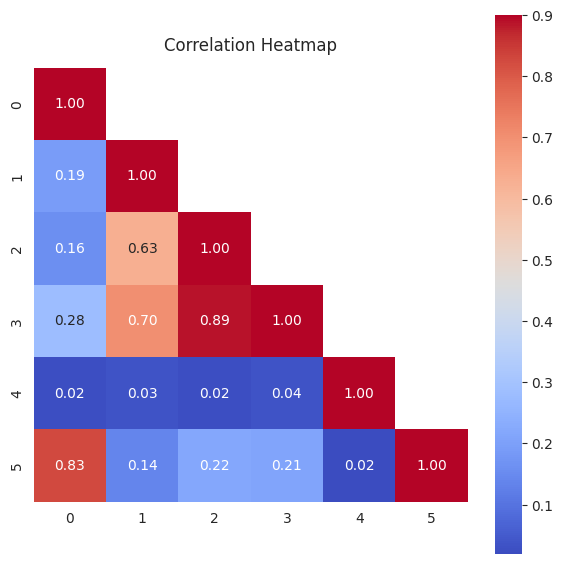

In [61]:
df_numeric = df_5.select_dtypes(include=[np.number])
df_corr = df_numeric.corr().abs()

corr_val = df_corr.values
mask = np.zeros_like(corr_val, dtype=np.bool_)
mask[np.triu_indices_from(mask, k=1)] = True  # k=1 to exclude the main diagonal

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    heatmap = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True, ax=ax, annot=True, fmt=".2f", cmap="coolwarm")
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [62]:
df_corr.loc[1, 1] = 1

In [63]:
# df_5 = df_4.reset_index()
# df_5 = df_5.drop(['No.'], axis = 1)
# df_5 = df_5.sample(frac = 1)
# sns.heatmap(df_5 == -1)

In [64]:
# negative_df = df_5 == -1
# number_of_negative_df = pd.DataFrame(negative_df.sum(), columns = ['count']).reset_index()
# df_size = len(df_5)
# to_drop = number_of_negative_df[number_of_negative_df['count'] > 1]['index'].values
# to_drop

In [65]:
df_6 = df_5.reset_index()
df_6 = df_6.drop(['index'], axis = 1)
df_6 = df_6.sample(frac = 1)

<Axes: >

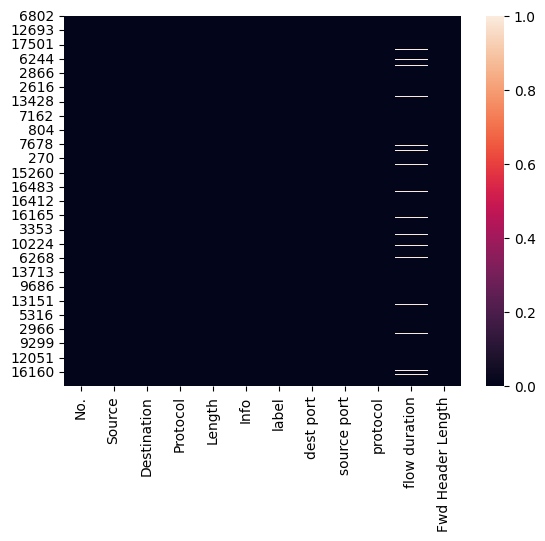

In [66]:
sns.heatmap(df_6 == 0)

In [67]:
# zero_df = df_6 == 0
# number_of_zero_df = pd.DataFrame(zero_df.sum(), columns = ['count']).reset_index()
# df_size = len(df_6)
# to_drop = number_of_zero_df[number_of_zero_df['count'] > (df_size * 0.85)]['index']
# to_drop

In [68]:
# df_7 = df_6.drop(to_drop, axis = 1)

In [69]:
df_8 = df_6.copy()
df_8

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Fwd Header Length
6802,5803,192.168.233.3,192.168.233.4,TCP,33370,52136 > 5201 [ACK] Seq=112094222 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,7.400000e-08,32
10110,9111,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=167916070 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,1.042300e-05,32
18092,17093,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=302955102 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,8.680000e-06,32
8774,7775,192.168.233.3,192.168.233.4,TCP,29026,"52136 > 5201 [PSH, ACK] Seq=142997438 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,3.125500e-05,32
6356,5357,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=104451678 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,9.484000e-06,32
...,...,...,...,...,...,...,...,...,...,...,...,...
9130,8131,192.168.233.3,192.168.233.4,TCP,42058,52136 > 5201 [ACK] Seq=149949286 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,7.595900e-05,32
16885,15886,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=279487366 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,4.436800e-05,32
10006,9007,192.168.233.3,192.168.233.4,TCP,5858,"52136 > 5201 [PSH, ACK] Seq=165761446 Ack=1 ...",benign,5201,52136,eth:ethertype:ip:tcp:data,4.918100e-05,32
4675,3676,192.168.233.3,192.168.233.4,TCP,29026,"52136 > 5201 [PSH, ACK] Seq=77511638 Ack=1 W...",benign,5201,52136,eth:ethertype:ip:tcp:data,1.874800e-05,32


In [70]:
df_9 = df_8.sample(frac = 1)
df_9

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Fwd Header Length
13704,12705,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,1.393000e-06,32
12182,11183,192.168.233.3,192.168.233.4,TCP,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,-5.710000e-07,32
16428,15429,192.168.233.3,192.168.233.4,TCP,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,8.043000e-06,32
13829,12830,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,3.715600e-05,32
17613,16614,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,3.682300e-05,32
...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,52136,5201,eth:ethertype:ip:tcp,3.187200e-05,32
19989,18990,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,4.315400e-05,32
14862,13863,192.168.233.3,192.168.233.4,TCP,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,6.300000e-08,32
2827,1828,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,5201,52136,eth:ethertype:ip:tcp:data,2.023000e-06,32


<Axes: >

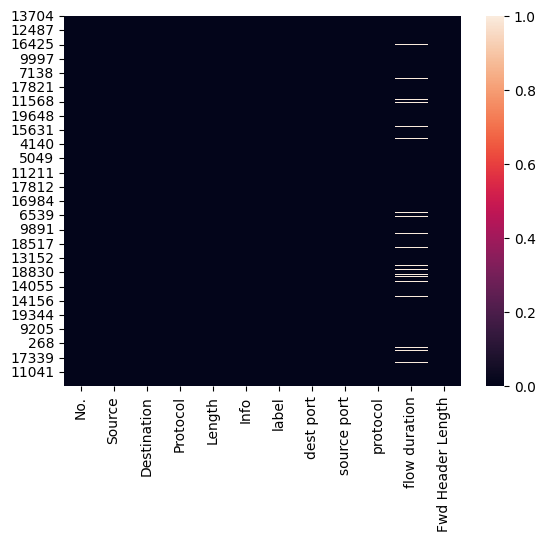

In [71]:
sns.heatmap(df_9 == 0)

In [72]:
df_9

,No.,Source,Destination,Protocol,Length,Info,label,dest port,source port,protocol,flow duration,Fwd Header Length
13704,12705,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,1.393000e-06,32
12182,11183,192.168.233.3,192.168.233.4,TCP,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,-5.710000e-07,32
16428,15429,192.168.233.3,192.168.233.4,TCP,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,8.043000e-06,32
13829,12830,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,3.715600e-05,32
17613,16614,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,3.682300e-05,32
...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,52136,5201,eth:ethertype:ip:tcp,3.187200e-05,32
19989,18990,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,52136,5201,eth:ethertype:ip:tcp,4.315400e-05,32
14862,13863,192.168.233.3,192.168.233.4,TCP,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,5201,52136,eth:ethertype:ip:tcp:data,6.300000e-08,32
2827,1828,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,5201,52136,eth:ethertype:ip:tcp:data,2.023000e-06,32


In [73]:
destination_port_df = pd.DataFrame(df_9['dest port'].value_counts())
dp_df_size = len(destination_port_df)
unmost_port = destination_port_df.tail(dp_df_size - 10).index
df_11 = df_9.copy()
df_11 = df_9.replace(to_replace = unmost_port, value =99999)
df_11 = pd.get_dummies(df_11, columns = ['dest port'])
df_11

,No.,Source,Destination,Protocol,Length,Info,label,source port,protocol,flow duration,Fwd Header Length,dest port_4040,dest port_5201,dest port_52120,dest port_52136
13704,12705,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,5201,eth:ethertype:ip:tcp,1.393000e-06,32,False,False,False,True
12182,11183,192.168.233.3,192.168.233.4,TCP,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,52136,eth:ethertype:ip:tcp:data,-5.710000e-07,32,False,True,False,False
16428,15429,192.168.233.3,192.168.233.4,TCP,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,52136,eth:ethertype:ip:tcp:data,8.043000e-06,32,False,True,False,False
13829,12830,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,5201,eth:ethertype:ip:tcp,3.715600e-05,32,False,False,False,True
17613,16614,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,5201,eth:ethertype:ip:tcp,3.682300e-05,32,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,5201,eth:ethertype:ip:tcp,3.187200e-05,32,False,False,False,True
19989,18990,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,5201,eth:ethertype:ip:tcp,4.315400e-05,32,False,False,False,True
14862,13863,192.168.233.3,192.168.233.4,TCP,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,52136,eth:ethertype:ip:tcp:data,6.300000e-08,32,False,True,False,False
2827,1828,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,52136,eth:ethertype:ip:tcp:data,2.023000e-06,32,False,True,False,False


In [74]:
Source_Port_df = pd.DataFrame(df_11['source port'].value_counts())
sp_df_size = len(Source_Port_df)
unmost_port = Source_Port_df.tail(sp_df_size - 10).index
df_12 = df_11.copy()
df_12['source port'] = df_11['source port'].replace(to_replace = unmost_port, value =99999)
df_12 = pd.get_dummies(df_12, columns = ['source port'])
df_12

,No.,Source,Destination,Protocol,Length,Info,label,protocol,flow duration,Fwd Header Length,...,source port_2967,source port_3050,source port_3086,source port_3271,source port_3837,source port_3888,source port_5201,source port_52120,source port_52136,source port_99999
13704,12705,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,eth:ethertype:ip:tcp,1.393000e-06,32,...,False,False,False,False,False,False,True,False,False,False
12182,11183,192.168.233.3,192.168.233.4,TCP,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,-5.710000e-07,32,...,False,False,False,False,False,False,False,False,True,False
16428,15429,192.168.233.3,192.168.233.4,TCP,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,8.043000e-06,32,...,False,False,False,False,False,False,False,False,True,False
13829,12830,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,eth:ethertype:ip:tcp,3.715600e-05,32,...,False,False,False,False,False,False,True,False,False,False
17613,16614,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,eth:ethertype:ip:tcp,3.682300e-05,32,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,eth:ethertype:ip:tcp,3.187200e-05,32,...,False,False,False,False,False,False,True,False,False,False
19989,18990,192.168.233.4,192.168.233.3,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,eth:ethertype:ip:tcp,4.315400e-05,32,...,False,False,False,False,False,False,True,False,False,False
14862,13863,192.168.233.3,192.168.233.4,TCP,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,6.300000e-08,32,...,False,False,False,False,False,False,False,False,True,False
2827,1828,192.168.233.3,192.168.233.4,TCP,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,eth:ethertype:ip:tcp:data,2.023000e-06,32,...,False,False,False,False,False,False,False,False,True,False


In [75]:
# df_12_encoded = pd.get_dummies(df_12, columns=['Source', 'Destination'])
# df_12_encoded
df_12_dropped = df_12.drop(['Source', 'Destination'], axis=1)
df_12_dropped

,No.,Protocol,Length,Info,label,protocol,flow duration,Fwd Header Length,dest port_4040,dest port_5201,...,source port_2967,source port_3050,source port_3086,source port_3271,source port_3837,source port_3888,source port_5201,source port_52120,source port_52136,source port_99999
13704,12705,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,eth:ethertype:ip:tcp,1.393000e-06,32,False,False,...,False,False,False,False,False,False,True,False,False,False
12182,11183,TCP,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,-5.710000e-07,32,False,True,...,False,False,False,False,False,False,False,False,True,False
16428,15429,TCP,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,8.043000e-06,32,False,True,...,False,False,False,False,False,False,False,False,True,False
13829,12830,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,eth:ethertype:ip:tcp,3.715600e-05,32,False,False,...,False,False,False,False,False,False,True,False,False,False
17613,16614,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,eth:ethertype:ip:tcp,3.682300e-05,32,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,eth:ethertype:ip:tcp,3.187200e-05,32,False,False,...,False,False,False,False,False,False,True,False,False,False
19989,18990,TCP,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,eth:ethertype:ip:tcp,4.315400e-05,32,False,False,...,False,False,False,False,False,False,True,False,False,False
14862,13863,TCP,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,6.300000e-08,32,False,True,...,False,False,False,False,False,False,False,False,True,False
2827,1828,TCP,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,eth:ethertype:ip:tcp:data,2.023000e-06,32,False,True,...,False,False,False,False,False,False,False,False,True,False


In [76]:
df_13_encoded = pd.get_dummies(df_12_dropped, columns = ['Protocol'])
df_13_encoded

,No.,Length,Info,label,protocol,flow duration,Fwd Header Length,dest port_4040,dest port_5201,dest port_52120,...,source port_52136,source port_99999,Protocol_ASAP,Protocol_AX4000,Protocol_DIAMETER,Protocol_DISTCC,Protocol_SABP,Protocol_TCP,Protocol_TPKT,Protocol_WOW
13704,12705,66,5201 > 52136 [ACK] Seq=1 Ack=229363398 Win=3...,benign,eth:ethertype:ip:tcp,1.393000e-06,32,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12182,11183,37714,52136 > 5201 [ACK] Seq=205472846 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,-5.710000e-07,32,False,True,False,...,True,False,False,False,False,False,False,True,False,False
16428,15429,13098,52136 > 5201 [ACK] Seq=272825118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,8.043000e-06,32,False,True,False,...,True,False,False,False,False,False,False,True,False,False
13829,12830,66,5201 > 52136 [ACK] Seq=1 Ack=231187878 Win=3...,benign,eth:ethertype:ip:tcp,3.715600e-05,32,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17613,16614,66,5201 > 52136 [ACK] Seq=1 Ack=292173294 Win=3...,benign,eth:ethertype:ip:tcp,3.682300e-05,32,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,4038,66,5201 > 52136 [ACK] Seq=1 Ack=82743262 Win=31...,benign,eth:ethertype:ip:tcp,3.187200e-05,32,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19989,18990,66,5201 > 52136 [ACK] Seq=1 Ack=332967798 Win=3...,benign,eth:ethertype:ip:tcp,4.315400e-05,32,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14862,13863,10202,52136 > 5201 [ACK] Seq=250019118 Ack=1 Win=6...,benign,eth:ethertype:ip:tcp:data,6.300000e-08,32,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2827,1828,20338,52136 > 5201 [ACK] Seq=38965878 Ack=1 Win=64...,benign,eth:ethertype:ip:tcp:data,2.023000e-06,32,False,True,False,...,True,False,False,False,False,False,False,True,False,False


In [77]:
string_columns = df_13_encoded.select_dtypes(include=['object']).columns

# Print the columns with string data type
print("Columns with string values:")
print(string_columns)

Columns with string values:
Index(['Info', 'label', 'protocol'], dtype='object')


In [78]:
columns_to_encode = ['Info', 'label', 'protocol']

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each column
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df_13_encoded[column] = label_encoders[column].fit_transform(df_13_encoded[column])

In [81]:
df_13 = z_score(df_13_encoded.drop(['label'], axis = 1))
df_13['label'] = df_13_encoded['label']
df_13

,No.,Length,Info,protocol,flow duration,Fwd Header Length,dest port_4040,dest port_5201,dest port_52120,dest port_52136,...,source port_99999,Protocol_ASAP,Protocol_AX4000,Protocol_DIAMETER,Protocol_DISTCC,Protocol_SABP,Protocol_TCP,Protocol_TPKT,Protocol_WOW,label
13704,0.025393,-0.858799,-1.085541,-1.336250,-0.106112,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
12182,-0.086807,1.281536,-0.033162,0.745623,-0.109219,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
16428,0.226204,-0.117914,0.178491,0.745623,-0.095593,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
13829,0.034608,-0.858799,-1.075668,-1.336250,-0.049544,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
17613,0.313561,-0.858799,-0.796119,-1.336250,-0.050071,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,-0.613528,-0.858799,-0.447116,-1.336250,-0.057902,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
19989,0.488717,-0.858799,-0.652361,-1.336250,-0.040056,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
14862,0.110760,-0.282555,0.102975,0.745623,-0.108216,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
2827,-0.776447,0.293689,0.383390,0.745623,-0.105116,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1


In [82]:
final_df = df_13.copy()
final_df['label'].value_counts()
final_df

,No.,Length,Info,protocol,flow duration,Fwd Header Length,dest port_4040,dest port_5201,dest port_52120,dest port_52136,...,source port_99999,Protocol_ASAP,Protocol_AX4000,Protocol_DIAMETER,Protocol_DISTCC,Protocol_SABP,Protocol_TCP,Protocol_TPKT,Protocol_WOW,label
13704,0.025393,-0.858799,-1.085541,-1.336250,-0.106112,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
12182,-0.086807,1.281536,-0.033162,0.745623,-0.109219,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
16428,0.226204,-0.117914,0.178491,0.745623,-0.095593,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
13829,0.034608,-0.858799,-1.075668,-1.336250,-0.049544,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
17613,0.313561,-0.858799,-0.796119,-1.336250,-0.050071,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,-0.613528,-0.858799,-0.447116,-1.336250,-0.057902,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
19989,0.488717,-0.858799,-0.652361,-1.336250,-0.040056,0.161470,-0.22941,-1.219626,-0.018711,1.357809,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
14862,0.110760,-0.282555,0.102975,0.745623,-0.108216,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1
2827,-0.776447,0.293689,0.383390,0.745623,-0.105116,0.161470,-0.22941,0.819882,-0.018711,-0.736444,...,-0.228564,-0.007071,-0.007071,-0.007071,-0.007071,-0.007071,0.020004,-0.01,-0.007071,1


## Predictions/testing

In [83]:
def visualize_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [84]:
def MLP():
    X = final_df.drop(['label'], axis = 1)
    y = final_df['label']
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    X_train.fillna(X_train.mean(), inplace=True)
    
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), 
                        activation='relu', 
                        solver='sgd', 
                        max_iter=1000, 
                        alpha=0.0001, 
                        batch_size='auto', 
                        verbose=False)
    
    mlp.fit(X_train, y_train)
    
    X_test.fillna(X_test.mean(), inplace=True)
    predictions = mlp.predict(X_test)
    
    
    # Evaluate model performance
    print("Number of Iterations: ", mlp.n_iter_)
    visualize_confusion_matrix(y_test, predictions)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print("Classification Report: ", "\n", classification_report(y_test, predictions))


Number of Iterations:  42


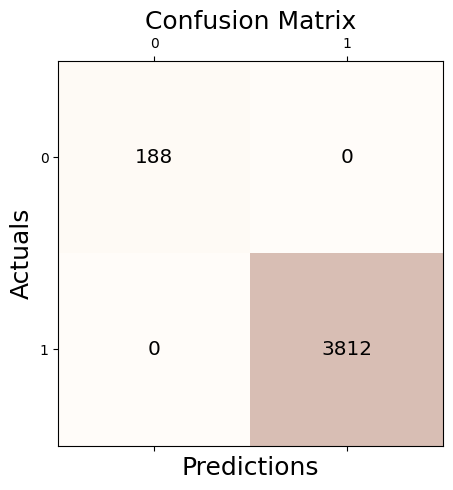

Accuracy:  1.0
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00      3812

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [85]:
MLP()